<Axes3D: title={'center': '3D Orientations Plot'}, xlabel='Width (Front)', ylabel='Depth', zlabel='Height'>

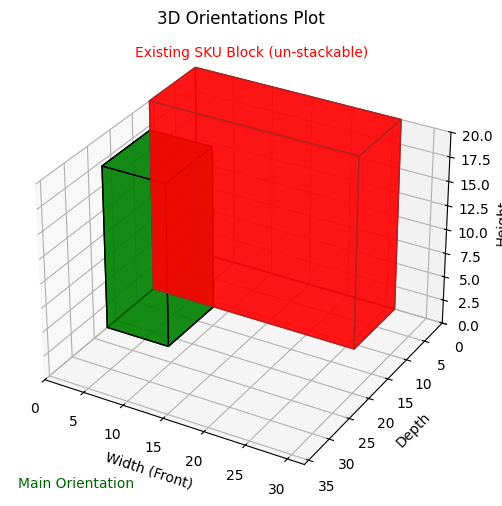

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def face_computation(x,y,z,w,l,h):
    # Define the vertices of the box
    vertices = [
        [x, y, z],
        [x + w, y, z],
        [x + w, y + l, z],
        [x, y + l, z],
        [x, y, z + h],
        [x + w, y, z + h],
        [x + w, y + l, z + h],
        [x, y + l, z + h]
    ]

    # Define the 6 faces of the box
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Bottom face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Front face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Top face
        [vertices[0], vertices[4], vertices[7], vertices[3]],  # Back face
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Left face
        [vertices[4], vertices[5], vertices[6], vertices[7]]   # Right face
    ]
    return faces


def plot_3d_boxes(occupied_W, occupied_L, occupid_w2, occupied_l2, loc_dims, complication, opt_solution):
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    

    # Draw 3D space boundary
    ax.set_xlim(0, loc_dims[0])
    ax.set_ylim(loc_dims[1], 0)
    ax.set_zlim(0, loc_dims[2])
    ax.set_xlabel('Width (Front)')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Height')
    ax.set_title('3D Orientations Plot')

    x0,y0,z0,w0,l0,h0 = 0,0,0,occupied_W,occupied_L,loc_dims[2]    
    existing_face = face_computation(x0,y0,z0,w0,l0,h0)

    
    ax.add_collection3d(Poly3DCollection(existing_face, facecolors='red', edgecolors = 'firebrick', linewidths=1, alpha=0.7))
    cx, cy, cz = x0-8, y0, loc_dims[2]
    ax.text(cx, cy, cz, 'Existing SKU Block (un-stackable)', color='red', fontsize=10, ha='left', va='center')

    x1,y1,z1 = 0, y0+l0,0
    w1,l1,h1 = opt_solution['orient'][0]


    sub_face_stack = None 

    if len(opt_solution['orient']) > 1: # there is sub orientation
        x2,y2,z2 = x0+w0,0,0
        w2,l2,h2 = opt_solution['orient'][1][0]
        sub_face_stack = face_computation(x2,y2,z2,w2,l2,h2)
        if opt_solution['orient'][1][1]: # there is complication
            x3,y3,z3 = x0+w0,0,0
            print(x3,y3,z3)
            w3,l3,h3 = opt_solution['orient'][1][1]
            sub_face_row = face_computation(x3,y3,z3,w3,l3,h3)
            ax.add_collection3d(Poly3DCollection(sub_face_row, facecolors='blue', edgecolors = 'black', linewidths=1, alpha=0.7))

    if complication:
        x02,y02,z02,w02,l02,h02 = 0, y0+l0, 0, occupid_w2,occupied_l2,loc_dims[2]
        stack_face = face_computation(x02,y02,z02,w02,l02,h02)

        y1 = y02+l02

        x2,y2,z2 = x02+w02,y0+l0,0

        if w2 and l2 and h2:
            sub_face_stack = face_computation(x2,y2,z2,w2,l2,h2)

        ax.add_collection3d(Poly3DCollection(stack_face, facecolors='red', edgecolors = 'firebrick', linewidths=1, alpha=0.7))

    main_face = face_computation(x1,y1,z1,w1,l1,h1)
    ax.add_collection3d(Poly3DCollection(main_face, facecolors='green', edgecolors = 'black', linewidths=1, alpha=0.7))
    cx, cy, cz = 10, loc_dims[1] + 22, 1.5
    ax.text(cx, cy, cz, 'Main Orientation', color='Darkgreen', fontsize=10, ha='left', va='center')


    if sub_face_stack:
        ax.add_collection3d(Poly3DCollection(sub_face_stack, facecolors='purple', edgecolors = 'black', linewidths=1, alpha=0.7))
        cx, cy, cz = loc_dims[0]+15, loc_dims[1], 4
        ax.text(cx, cy, cz, 'Sub Orientation', color='blue', fontsize=10, ha='center', va='center')

    return ax


plot_3d_boxes(26.0, 11.0, 13.0, 11.0, (32,36,20),False, {'orient': [[8.0, 11.0, 17.0]], 'n_case': [4.0, [np.float64(2.0), 0]]})
